In [25]:
import pandas as pd
import numpy as np
import re
import json
import matplotlib.pyplot as plt

In [8]:
logins = json.load(open("logins.json"))
logins_dat = pd.DataFrame(logins)
logins_dat[:5]

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [32]:
print(logins_dat.shape)

(93142, 1)


In [23]:
time_s = [pd.Timestamp(x) for x in logins_dat.login_time]

In [24]:
time_s[:5]

[Timestamp('1970-01-01 20:13:18'),
 Timestamp('1970-01-01 20:16:10'),
 Timestamp('1970-01-01 20:16:37'),
 Timestamp('1970-01-01 20:16:36'),
 Timestamp('1970-01-01 20:26:21')]

In [34]:
dat = pd.Series([1]*logins_dat.shape[0], 
               index= time_s)

In [37]:
converted = dat.resample('15Min').sum()
converted.head()

1970-01-01 20:00:00    2.0
1970-01-01 20:15:00    6.0
1970-01-01 20:30:00    9.0
1970-01-01 20:45:00    7.0
1970-01-01 21:00:00    1.0
Freq: 15T, dtype: float64

In [38]:
# compare with the original data series to double check our results
logins_dat.groupby('login_time').size()[:10] 

login_time
1970-01-01 20:12:16    1
1970-01-01 20:13:18    1
1970-01-01 20:16:10    1
1970-01-01 20:16:36    1
1970-01-01 20:16:37    1
1970-01-01 20:21:41    1
1970-01-01 20:26:05    1
1970-01-01 20:26:21    1
1970-01-01 20:31:03    1
1970-01-01 20:34:46    1
dtype: int64

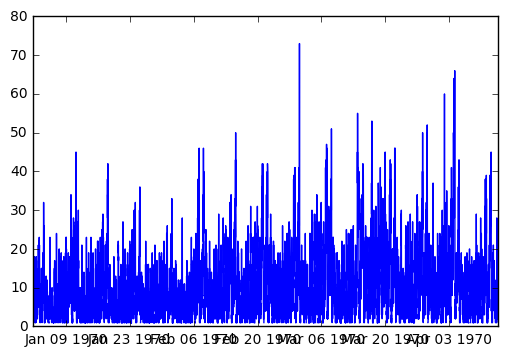

In [39]:
# visualize the spread of time
plt.plot(converted.index, converted.values)
plt.ylabel('Number of logins')
plt.xlabel('Timestamp')
plt.show()

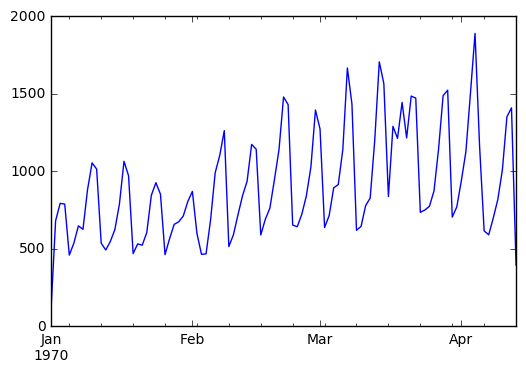

In [44]:
%matplotlib inline
# plot the daily total logins for the whole time series
daily = converted.resample('D').sum()
daily.plot() 

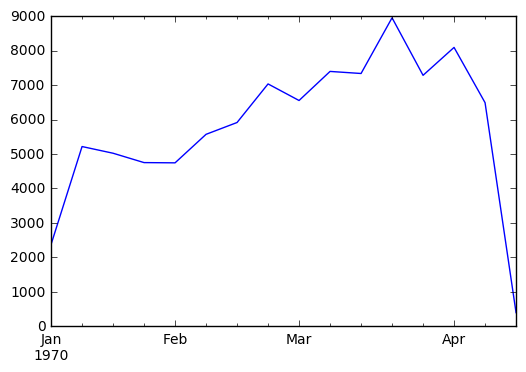

In [42]:
# plot the daily total logins for the whole time series
converted.resample('W').sum().plot() 

* It seems that there is an overall increasing trend in the weekly total number of logins. 
* Within each week, there is a cycle of high logins during the week and low logins on the weekends.
* However, this weekly pattern seems less clear in between the second and third week of March, as shown in the daily step plot. Thus, we shall take a closer look at that time period. 

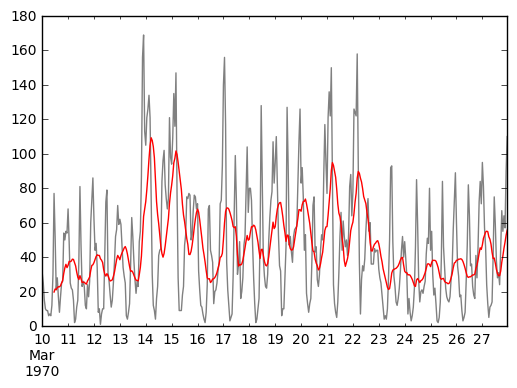

In [51]:
#converted
hourly = converted.resample('H').sum()
sub_hourly = hourly['1970-03-10':'1970-03-27']
r = sub_hourly.rolling(window=12)
sub_hourly.plot(color = 'gray')
r.mean().plot(color = 'red')

In [49]:
converted.index[0].

Timestamp('1970-01-01 20:00:00', offset='15T')